In [17]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas import DataFrame
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import multilabel_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
import scipy.stats as stats
!pip install imblearn



import warnings
warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable


In [8]:
# Loading the data from csv file to dataframe.
url='https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv'
names = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']
glass_df = pd.read_csv(url, names=names)

In [9]:
glass_df.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [10]:
#get info about the datatypes of each feature
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


In [11]:
#get counts of null values for each feature
glass_df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [12]:
# There are no missing values

In [13]:
glass_df.describe() 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [14]:
#All the attributes are numerical. Even the type which is categorical in nature is represented as integers.

In [15]:
# Exploratory Data Analyses

Text(0.5, 1.0, 'Count of Glass Types')

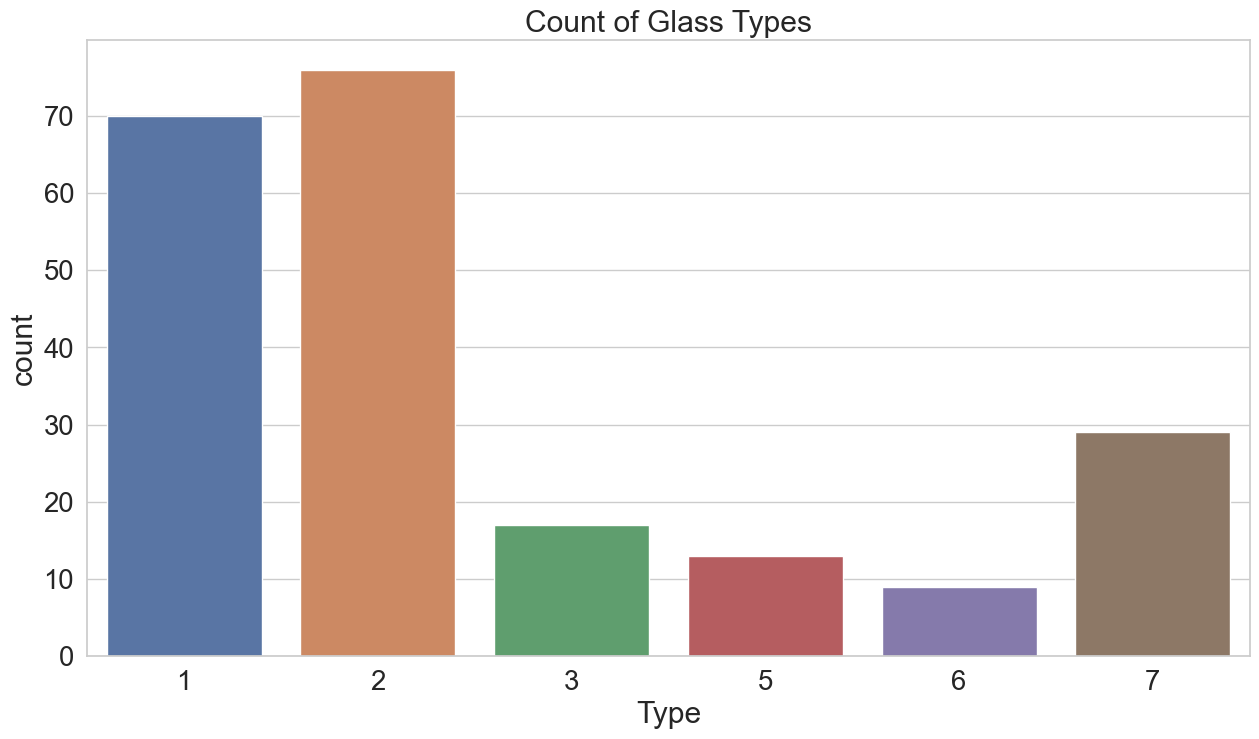

In [18]:
sns.set(style="whitegrid", font_scale=1.8)
plt.subplots(figsize = (15,8))
sns.countplot('Type',data=glass_df).set_title('Count of Glass Types')

In [19]:
# We see that Type 2 and 1 have the highest occurences in the dataset.

In [20]:
# Checked both mean and median. 
glass_df.groupby('Type', as_index=False).mean()

,Type,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,1.518718,13.242286,3.552429,1.163857,72.619143,0.447429,8.797286,0.012714,0.057000
1,2,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
2,3,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
3,5,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
4,6,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
5,7,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


In [21]:
##Separating the data into dependent and independent variables.
glass_X = glass_df.drop('Type', axis = 1)
glass_X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [22]:
glass_Y = glass_df['Type']
glass_Y.head()

1    1
2    1
3    1
4    1
5    1
Name: Type, dtype: int64

In [23]:
glass_Y.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [24]:
# Visualization

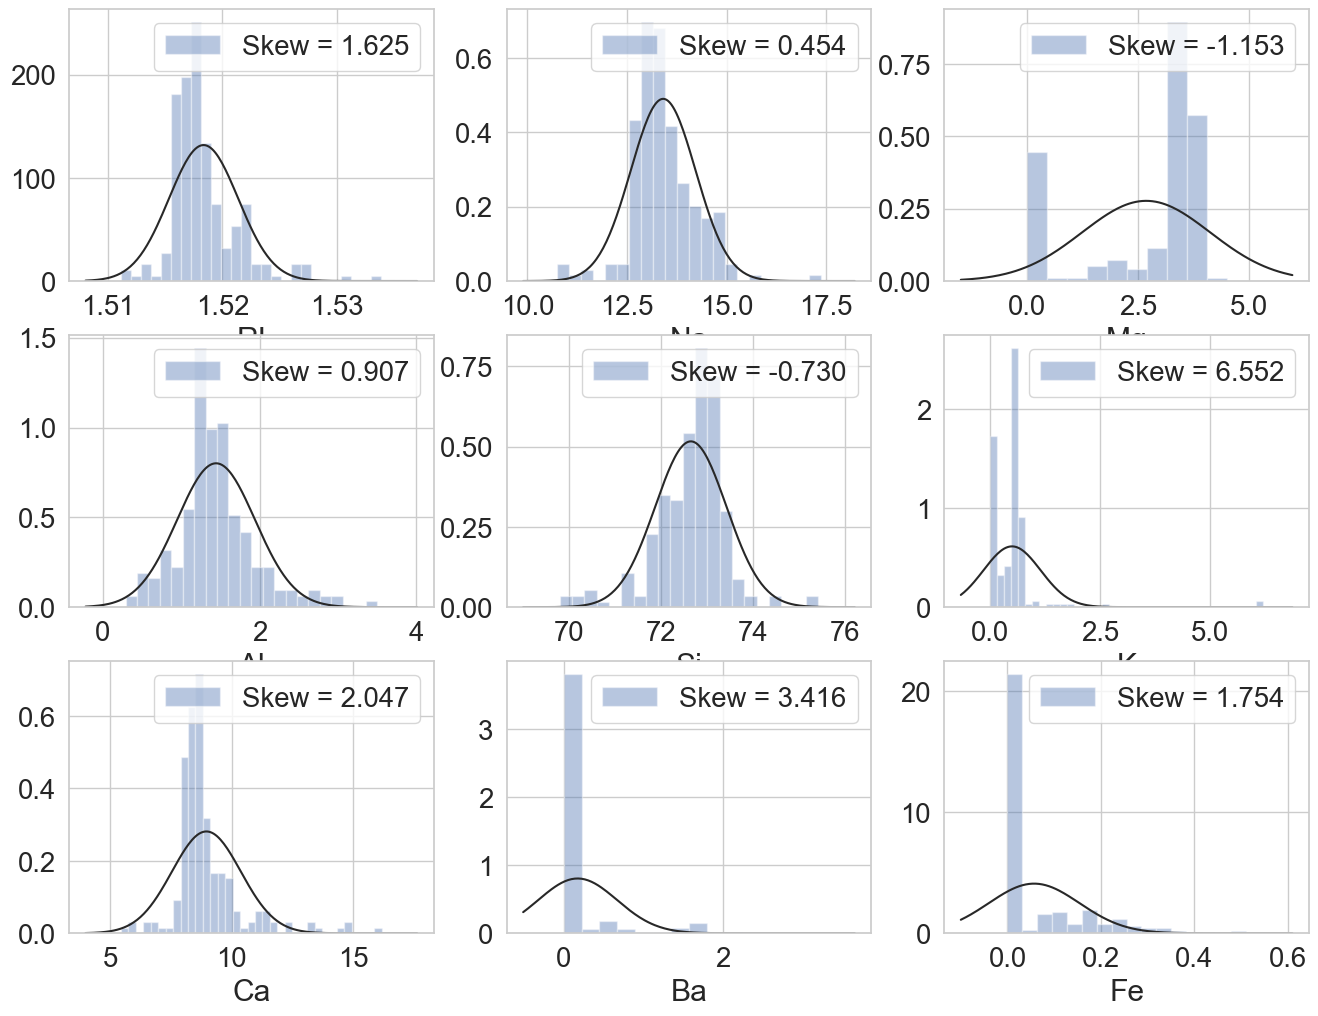

In [25]:
#plotting a histogram of each independent feature for visualization
cols = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
fig,ax = plt.subplots(3,3, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in cols:
    skew = glass_df[col].skew()
    sns.distplot(glass_df[col], ax = ax[i], fit= stats.norm, kde=False, label='Skew = %.3f' %(skew))
    ax[i].legend(loc='best')
    i += 1
plt.show()

In [26]:
# Interpretation of Graphs : None of the features are normally distributed. 

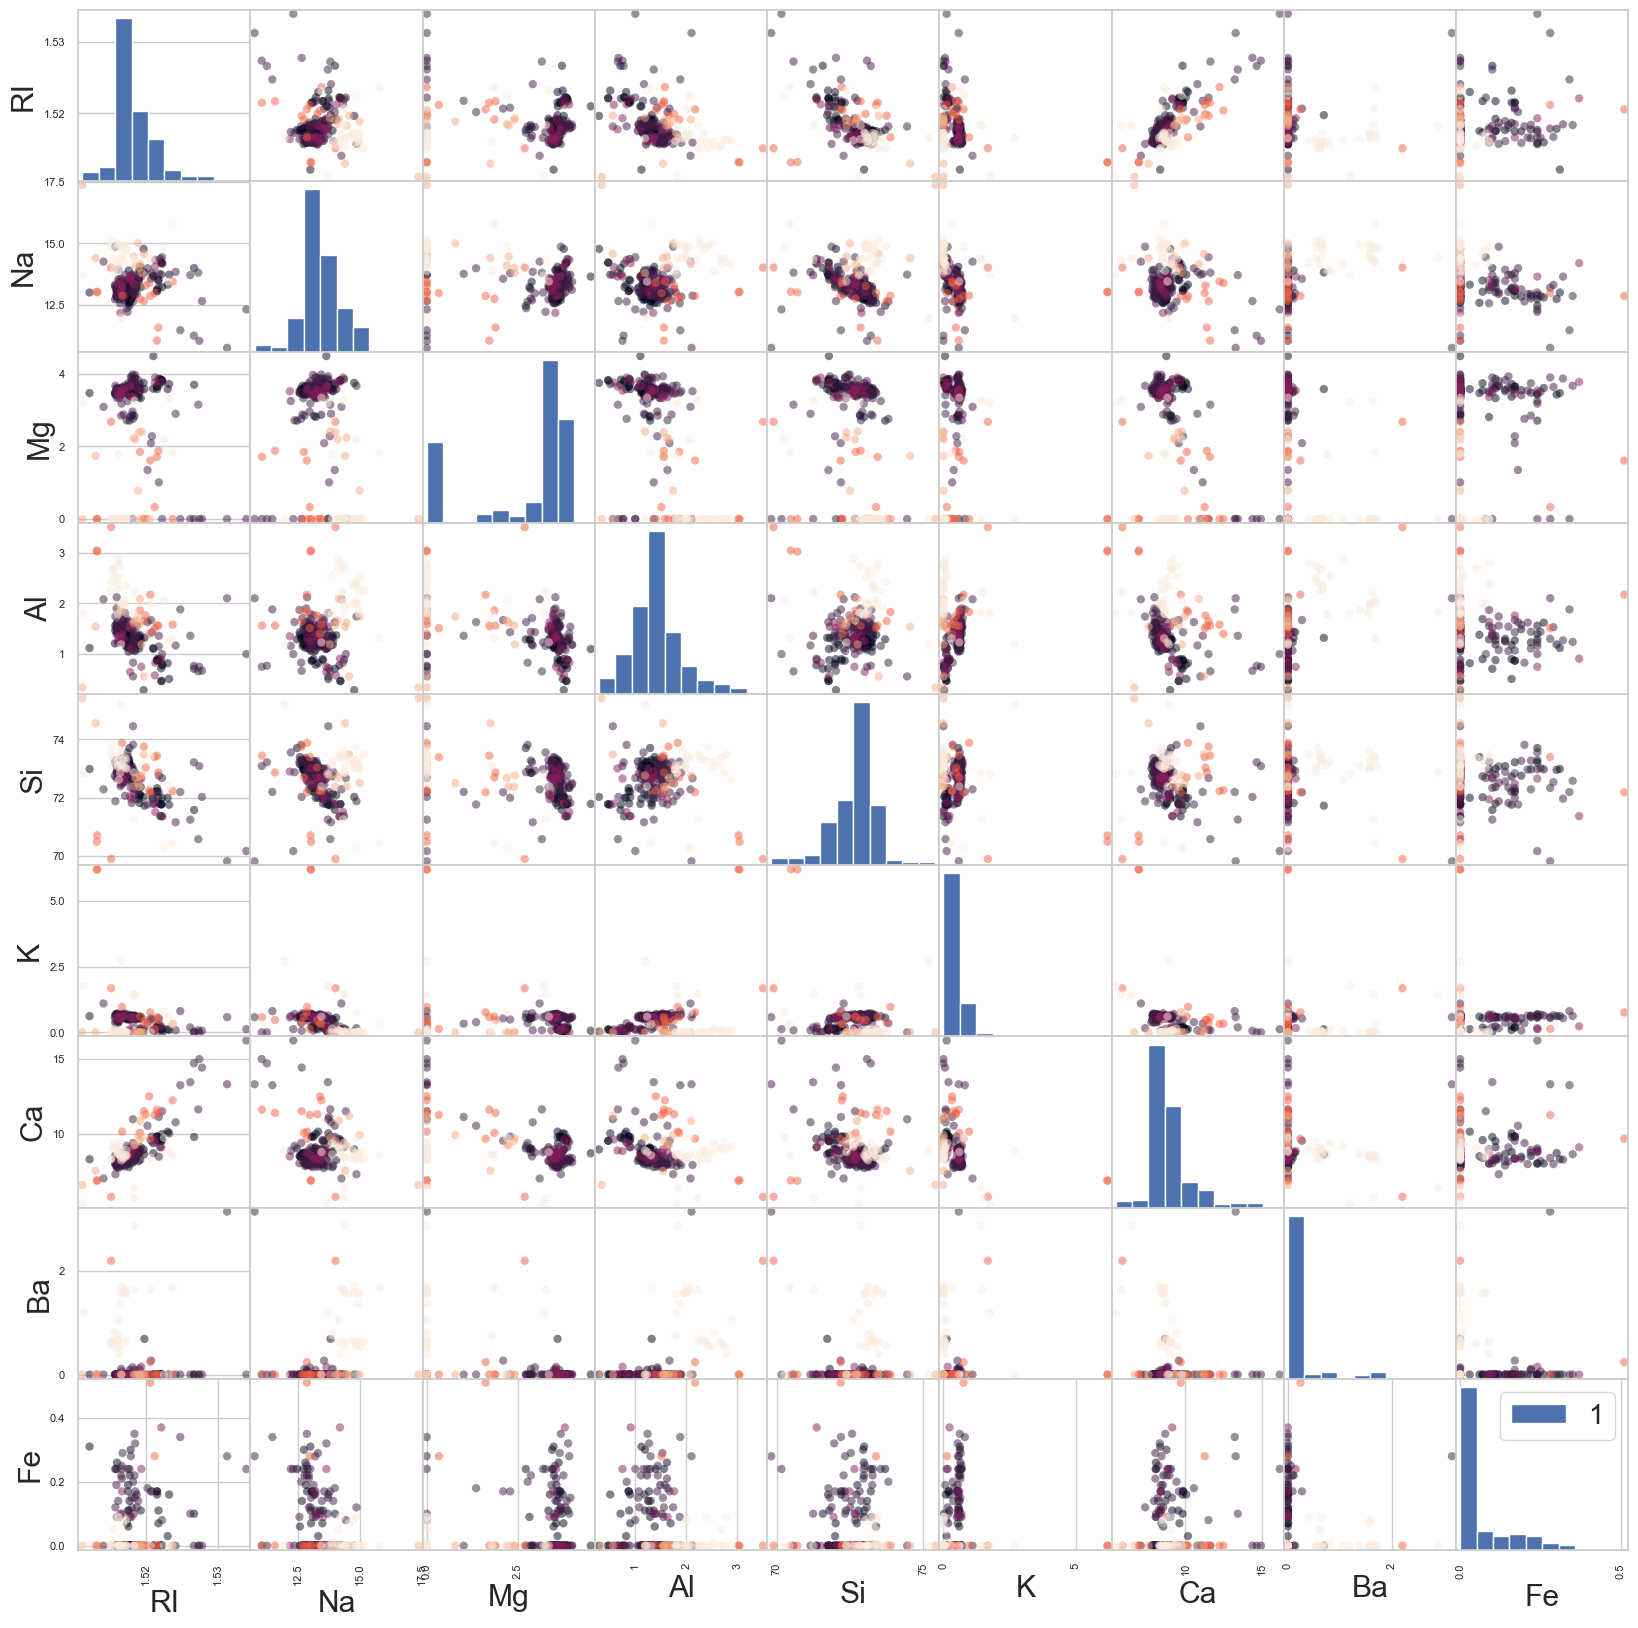

In [27]:
#Scatter Matrix
pd.plotting.scatter_matrix(glass_df.iloc[:,:-1], c=glass_df.iloc[:,-1], figsize=(20, 20), marker='o')
plt.legend(glass_df["Type"].unique())
plt.show()

In [28]:
# On most dimensions, the points are scattered

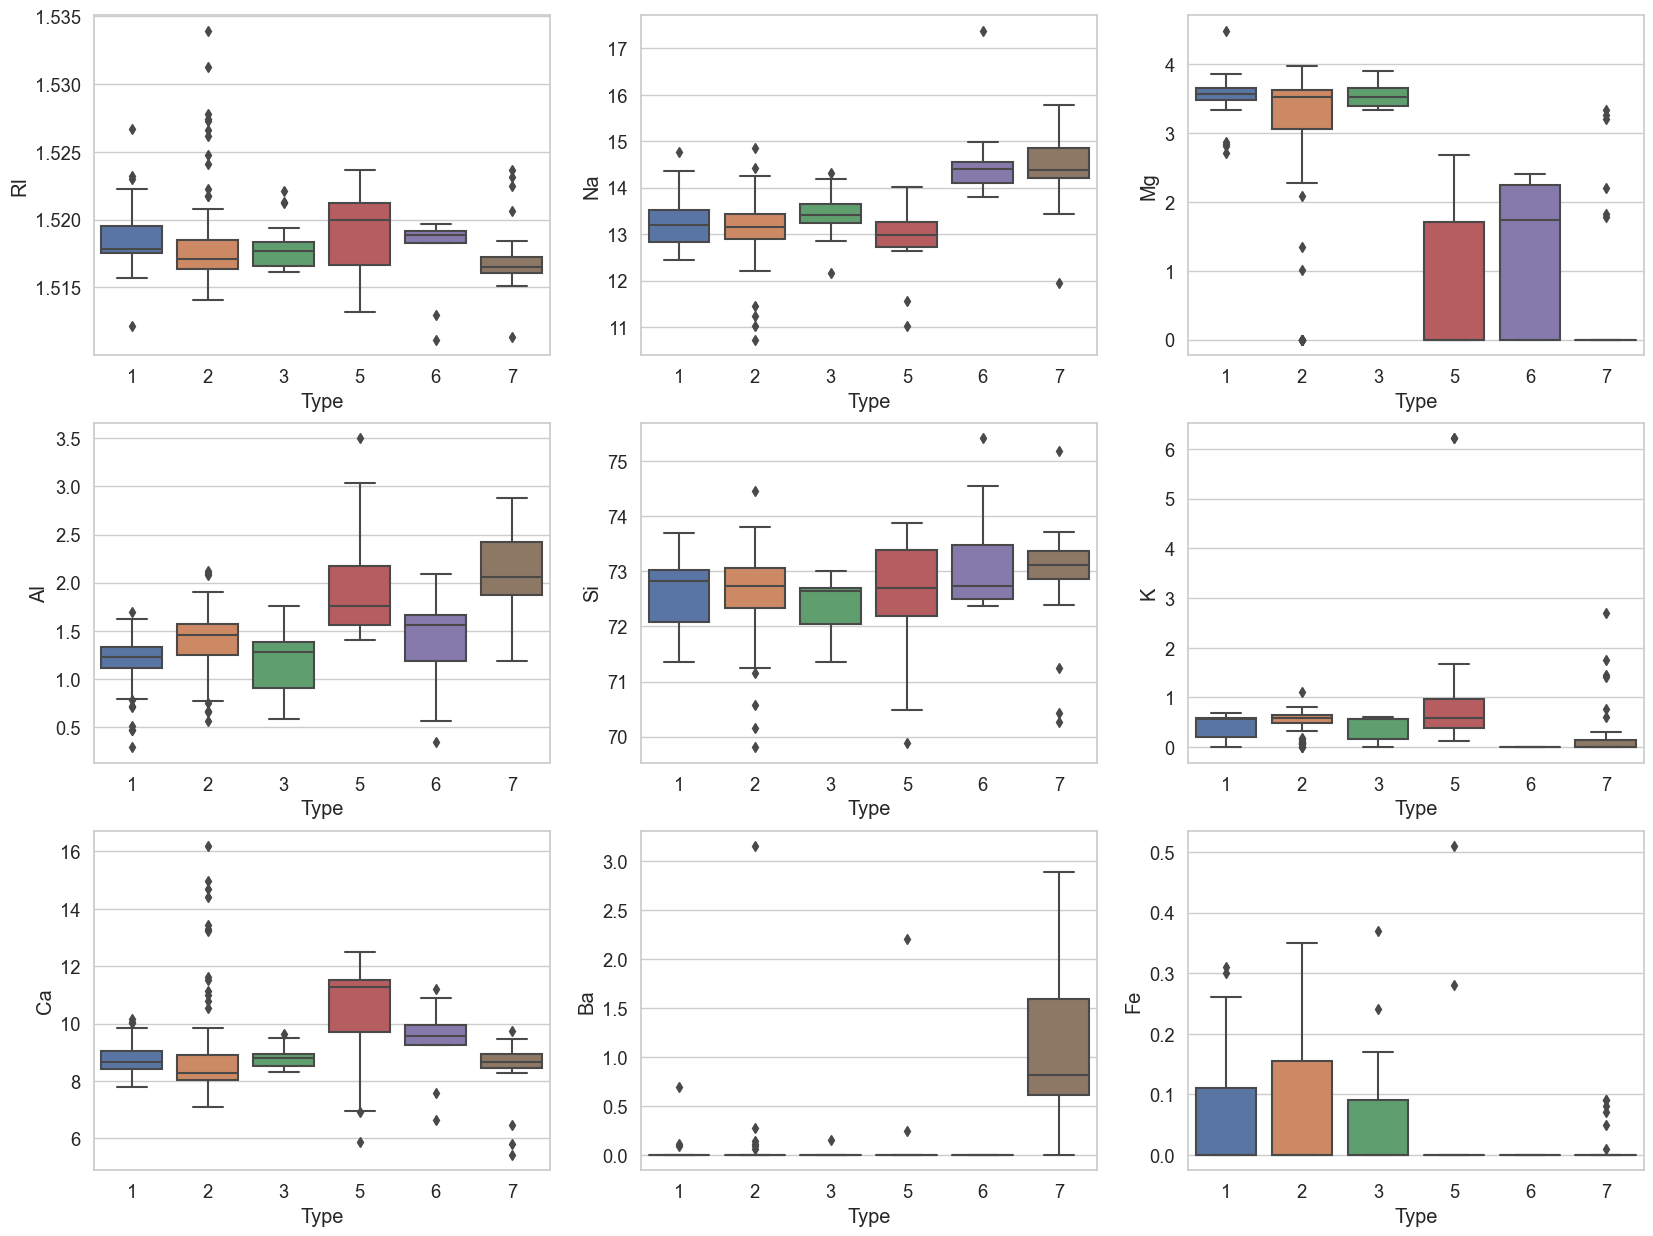

In [29]:
# # Checking for outliers
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type', y='RI', data=glass_df)
plt.subplot(3,3,2)
sns.boxplot(x='Type', y='Na', data=glass_df)
plt.subplot(3,3,3)
sns.boxplot(x='Type', y='Mg', data=glass_df)
plt.subplot(3,3,4)
sns.boxplot(x='Type', y='Al', data=glass_df)
plt.subplot(3,3,5)
sns.boxplot(x='Type', y='Si', data=glass_df)
plt.subplot(3,3,6)
sns.boxplot(x='Type', y='K', data=glass_df)
plt.subplot(3,3,7)
sns.boxplot(x='Type', y='Ca', data=glass_df)
plt.subplot(3,3,8)
sns.boxplot(x='Type', y='Ba', data=glass_df)
plt.subplot(3,3,9)
sns.boxplot(x='Type', y='Fe', data=glass_df)
plt.show()

In [30]:
#Outliersare seen in the plot.Also, Outlier treatment may be done to check impact on classification

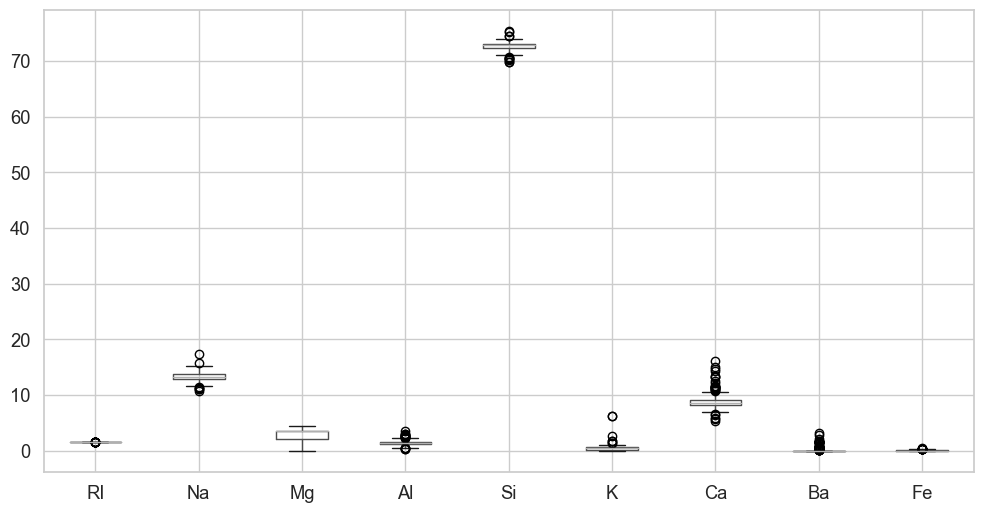

In [31]:
# Checking for outliers
glass_df.iloc[:,:-1].boxplot(figsize=(12,6))
plt.show()


In [32]:
#Outlier Treatment
numerical_features=['RI', 'Na', 'Mg', 'Al','Si','K','Ca','Ba','Fe']
for cols in numerical_features:
    Q1 = glass_X[cols].quantile(0.25)
    Q3 = glass_X[cols].quantile(0.75)
    IQR = Q3 - Q1  
    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR

    glass_X[cols] = (np.where(glass_X[cols] >= Upper_Whisker, Upper_Whisker, glass_X[cols]))
    glass_X[cols] = (np.where(glass_X[cols] <= Lower_Whisker, Lower_Whisker, glass_X[cols]))

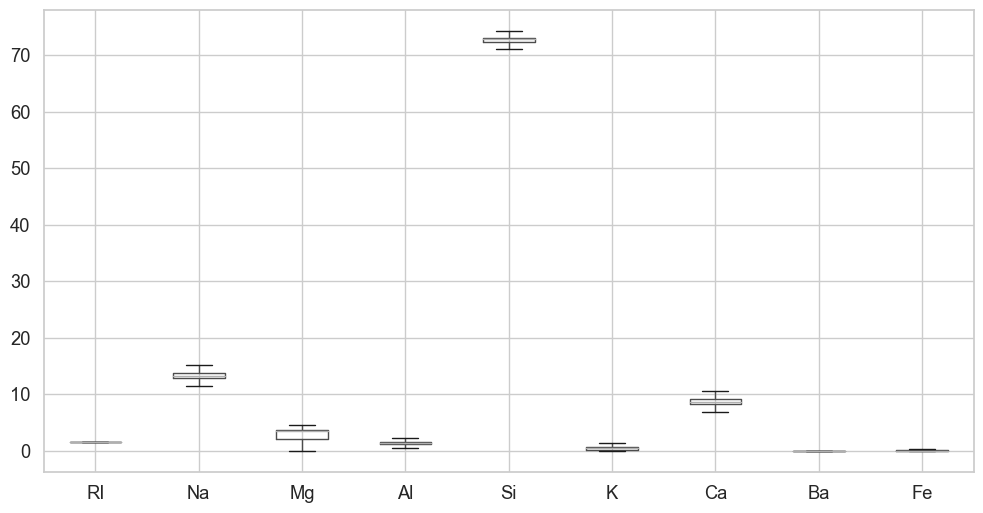

In [33]:
#Checking if the outliers are treated
glass_X.boxplot(figsize=(12,6))
plt.show()

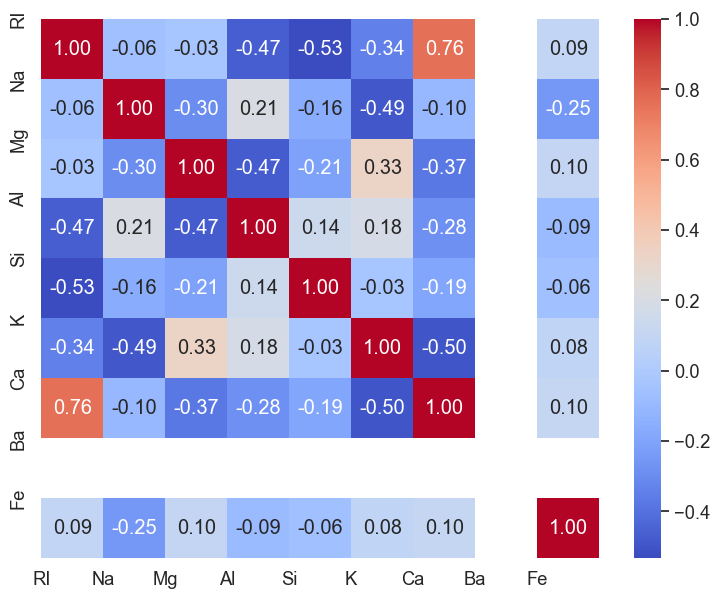

In [35]:
#Checking for correlation between independent variables
corr = glass_X.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(9, 7))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [37]:
#Principal Component Analysis

In [38]:
# # Reducing the dimensionality of our dataset using PCA
pca = PCA()
pca.fit(glass_X)

PCA()

In [39]:
pca.n_components_

9

In [40]:
#To find the variance explained by different components
DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,10)], columns=["Explained Variance"]).T

,P1,P2,P3,P4,P5,P6,P7,P8,P9
Explained Variance,2.33,0.8,0.58,0.28,0.08,0.03,0.01,0.0,0.0


In [41]:
#Proportion of variance explained by individual components
DataFrame(pca.explained_variance_ratio_.round(2), index = ["P" + str(i) for i in range(1,10)], 
          columns=["Explained Variance Ratio"]).T

,P1,P2,P3,P4,P5,P6,P7,P8,P9
Explained Variance Ratio,0.57,0.19,0.14,0.07,0.02,0.01,0.0,0.0,0.0


In [42]:
# Since, first three components explain 90% of the total variation in the dataset, we choose them as our Principal Components.
pca = PCA(n_components = 3)
glass_X_pca = pca.fit_transform(glass_X)

In [43]:
#Eigenvectors of the 3 Principal Components
pca.components_ 

array([[ 1.72995169e-04,  1.62250600e-01, -9.35923137e-01,
         1.18812114e-01,  7.89466623e-02, -8.33017145e-02,
         2.65334912e-01,  0.00000000e+00, -5.64878848e-03],
       [-2.17098042e-03,  3.35871650e-01, -1.32096979e-01,
         2.61527727e-01,  2.80729510e-01,  8.57134950e-02,
        -8.45465900e-01,  0.00000000e+00, -1.92537851e-02],
       [-9.52349681e-04, -7.70656345e-01, -1.09210984e-01,
         3.74421023e-02,  6.04024133e-01,  1.54605768e-01,
        -6.16045576e-02, -0.00000000e+00,  1.46875199e-02]])

In [44]:
#Linear Combination
df = pd.DataFrame(pca.components_, columns=list(glass_X.columns))
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.000173,0.162251,-0.935923,0.118812,0.078947,-0.083302,0.265335,0.0,-0.005649
1,-0.002171,0.335872,-0.132097,0.261528,0.280730,0.085713,-0.845466,0.0,-0.019254
2,-0.000952,-0.770656,-0.109211,0.037442,0.604024,0.154606,-0.061605,-0.0,0.014688


In [45]:
#Explained Variance of 3 individual Principal Components
pca.explained_variance_ratio_ 

array([0.56792161, 0.19451105, 0.14215941])

In [46]:
print(sum(pca.explained_variance_ratio_))

0.9045920684145679


In [47]:
#Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(glass_X_pca, glass_Y, test_size=1/5, random_state=5)

In [48]:
# K Nearest Neighbours Classifier

In [49]:
test_scores = []
train_scores = []

# we will be testing 14 different values for k, starting with 1 and ending before 15
for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [50]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [51]:
# This score comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 74.4186046511628 % and k = [1]


In [52]:
y_test.value_counts()

1    16
2    15
7     7
3     2
6     2
5     1
Name: Type, dtype: int64

In [53]:
# Random Forest Classifier

[[ 9  4  3  0  0  0]
 [ 1 13  0  0  0  1]
 [ 2  0  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  1  0  0  0  1]
 [ 1  0  0  0  1  5]]
AxesSubplot(0.125,0.11;0.62x0.77)
Accuracy:  65.11627906976744 %


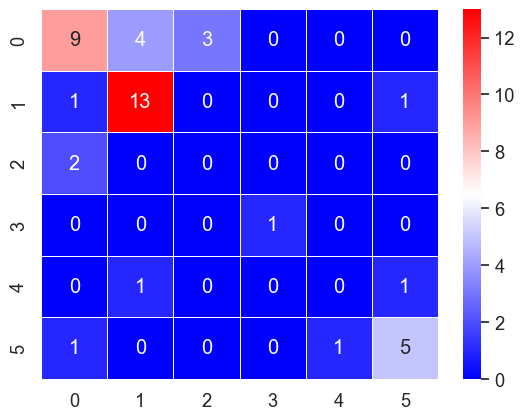

In [54]:
clf=RandomForestClassifier(random_state = 45)
clf.fit(X_train,y_train)
y_preds=clf.predict(X_test)
mat=confusion_matrix(y_test,y_preds)
print(mat)
print(sns.heatmap(mat,annot=True,cmap='bwr',linewidths=.5))
acc=accuracy_score(y_test,y_preds)
print("Accuracy: ",acc*100,"%")

In [55]:
# Normalization

In [56]:
#Improving the accuracy score by normalizing the data
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(glass_X)
X_norm = pd.DataFrame(X_minmax)

In [57]:
#Peek at the new normalized features
X_norm.head()

,0,1,2,3,4,5,6,7,8
0,0.800759,0.574591,1.000000,0.323864,0.220201,0.044734,0.511729,0.0,0.0
1,0.478178,0.642711,0.801782,0.471591,0.514319,0.357875,0.265080,0.0,0.0
2,0.342505,0.544619,0.790646,0.573864,0.594814,0.290774,0.251676,0.0,0.0
3,0.482922,0.457425,0.821826,0.431818,0.477167,0.424977,0.369638,0.0,0.0
4,0.460152,0.473774,0.806236,0.403409,0.622678,0.410065,0.329424,0.0,0.0


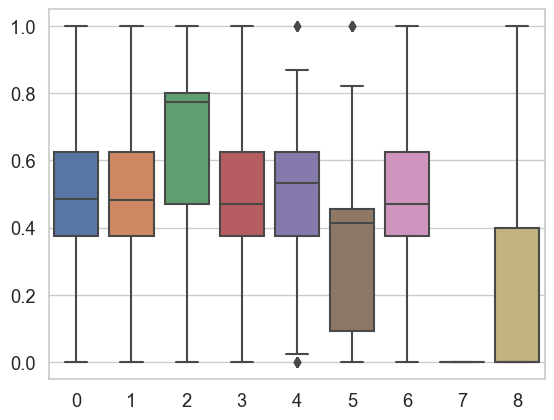

In [58]:
#All values fall between 0 and 1
ax = sns.boxplot(data=X_norm)

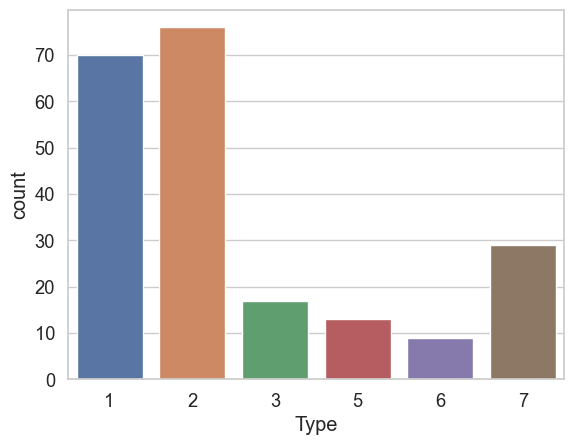

In [59]:
#Getting the distribution of the different glass types
sns.countplot(glass_df["Type"])
plt.show()

In [60]:
# Using SMOTE

[Text(0.5, 0, 'Type of Glass'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'After SMOTE')]

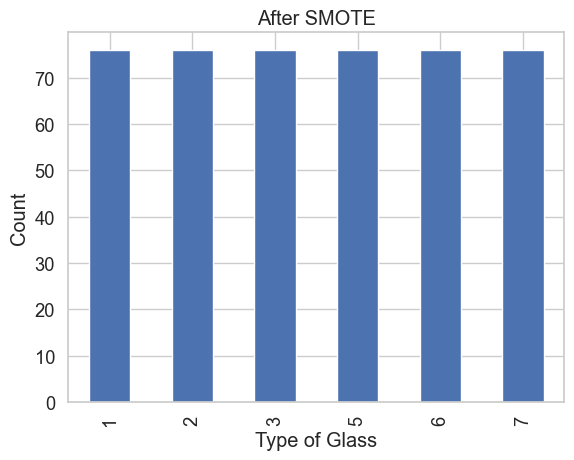

In [61]:
#As we can see, a couple of our types of glass have many more values than the rest. SMOTE will fill in the difference.
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(X_norm, glass_Y)
y_res_df = pd.DataFrame(y_res)
ax = y_res_df.Type.value_counts().plot(kind="bar")
ax.set(xlabel="Type of Glass", ylabel="Count", title = "After SMOTE")

In [62]:
# Principal Component Analysis

In [63]:
# Reducing the dimensionality of our dataset using PCA
pca = PCA()
pca.fit(x_res)

PCA()

In [64]:
pca.n_components_

9

In [66]:
#To find the variance explained by different components
DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,10)], columns=["Explained Variance"])

,Explained Variance
P1,0.17
P2,0.12
P3,0.08
P4,0.06
P5,0.05
P6,0.02
P7,0.01
P8,0.01
P9,0.00


In [67]:
#Proportion of variance explained by individual components
DataFrame(pca.explained_variance_ratio_.round(2), index = ["P" + str(i) for i in range(1,10)], 
          columns=["Explained Variance Ratio"]).T

,P1,P2,P3,P4,P5,P6,P7,P8,P9
Explained Variance Ratio,0.33,0.24,0.16,0.12,0.09,0.04,0.01,0.01,0.0


In [68]:
# Since,first three components explain 90% of the total variation in the dataset,we choose them as our Principal Components.
pca = PCA(n_components = 5)
glass_X_pca_smote = pca.fit_transform(x_res)

In [69]:
#Eigenvectors of the 5 Principal Components
pca.components_ 

array([[ 0.05681518,  0.24931384, -0.74339821,  0.23833965,  0.17351306,
        -0.38013675,  0.30022267, -0.        , -0.24581206],
       [ 0.51202689, -0.15501489,  0.08658627, -0.41085324, -0.07646722,
        -0.28041935,  0.56323656,  0.        ,  0.3684883 ],
       [-0.03894408, -0.26248662, -0.35660933,  0.41506433,  0.0129444 ,
         0.35291286,  0.03362081,  0.        ,  0.71013387],
       [-0.34424991,  0.28672647,  0.09248141, -0.18621392,  0.43206455,
        -0.49948049, -0.27246591, -0.        ,  0.49563423],
       [-0.191784  , -0.58917519, -0.07037328, -0.23783919,  0.67698818,
         0.15044482,  0.15980041,  0.        , -0.2192916 ]])

In [70]:
#Linear Combination
data = pd.DataFrame(pca.components_, columns=list(x_res.columns))
data.head()

,0,1,2,3,4,5,6,7,8
0,0.056815,0.249314,-0.743398,0.238340,0.173513,-0.380137,0.300223,-0.0,-0.245812
1,0.512027,-0.155015,0.086586,-0.410853,-0.076467,-0.280419,0.563237,0.0,0.368488
2,-0.038944,-0.262487,-0.356609,0.415064,0.012944,0.352913,0.033621,0.0,0.710134
3,-0.344250,0.286726,0.092481,-0.186214,0.432065,-0.499480,-0.272466,-0.0,0.495634
4,-0.191784,-0.589175,-0.070373,-0.237839,0.676988,0.150445,0.159800,0.0,-0.219292


In [71]:
#Explained Variance of 5 individual Principal Components
pca.explained_variance_ratio_ 

array([0.32713006, 0.23697046, 0.1615787 , 0.12316252, 0.09130851])

In [72]:
print(sum(pca.explained_variance_ratio_))

0.9401502564822737


In [73]:
#Splitting into train and test
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(glass_X_pca_smote, y_res, test_size=1/5, random_state=5)

In [74]:
# Using K Nearest Neighbours Classifier

In [75]:
test_scores = []
train_scores = []

# we will be testing 14 different values for k, starting with 1 and ending before 15
for i in range(1,15):

    knn_sm = KNeighborsClassifier(i)
    knn_sm.fit(X_train_sm,y_train_sm)
    
    train_scores.append(knn_sm.score(X_train_sm,y_train_sm))
    test_scores.append(knn_sm.score(X_test_sm,y_test_sm))

In [76]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [77]:
# This score comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {}% and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 88.04347826086956% and k = [1]


[[13  0  0  0  0  0]
 [ 0 11  1  0  1  0]
 [ 2  0 12  0  0  0]
 [ 0  0  0 22  0  0]
 [ 0  0  0  0 16  0]
 [ 0  1  0  2  1 10]]
AxesSubplot(0.125,0.11;0.62x0.77)
Accuracy: 91.30434782608695 %


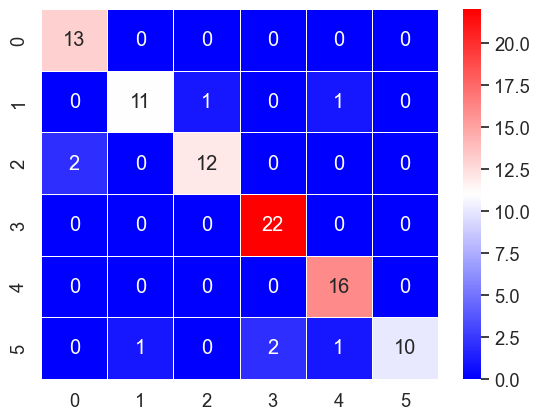

In [78]:
clf_sm=RandomForestClassifier(random_state = 45)
clf_sm.fit(X_train_sm,y_train_sm)
y_preds_sm=clf_sm.predict(X_test_sm)
mat_sm=confusion_matrix(y_test_sm,y_preds_sm)
print(mat_sm)
print(sns.heatmap(mat_sm,annot=True,cmap='bwr',linewidths=.5))
acc_sm=accuracy_score(y_test_sm,y_preds_sm)
print("Accuracy:",acc_sm*100,"%")